 # Final Project
 #### Convolutional Networks for Image classification : Rock, Paper, Scissors
 Maddie Lebiedzinski and Ethan Kong

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop 
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

2023-04-28 16:29:40.273966: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# for train images 
train_path = "Rock-Paper-Scissors/train/"
# for test images 
test_path = "Rock-Paper-Scissors/test/"
# validation
validation_path = "Rock-Paper-Scissors/validation/"

### Load and visualize data

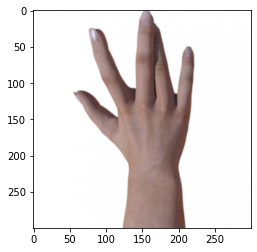

In [3]:
# example of a loaded image
img = image.load_img(train_path + "/paper/paper01-000.png")
plt.imshow(img)
plt.axis("on")
plt.show()

In [4]:
# shape of this image 
cv2.imread(train_path + "/paper/paper01-000.png").shape
# output : 300 pixels height, 300 pixels width, rgb 3 colors

(300, 300, 3)

In [5]:
# generating training 
train = ImageDataGenerator(rescale= 1/255) # because rgb values go up to 255
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory(train_path, 
                                         target_size= (300, 300), # image size 
                                         batch_size = 32, # 
                                         class_mode = 'categorical') # 3 categories

validation_dataset = train.flow_from_directory(validation_path, 
                                         target_size= (300, 300), # image size 
                                         batch_size = 32, # 
                                         class_mode = 'categorical') # 3 categories

Found 2520 images belonging to 3 classes.
Found 33 images belonging to 3 classes.


In [7]:
train_dataset.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [8]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

### Construct deep learning model

In [9]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape= (300,300,3)), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu'), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                                           
                                    tf.keras.layers.Conv2D(64,(3, 3), activation = 'relu'), 
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(), 
                                    
                                    tf.keras.layers.Dense(2892, activation= 'relu'),
                                                          # number of images 
                                    tf.keras.layers.Dense(3, activation= 'softmax')
])                                                        # 3 categories of hands


# to view all the layers of the network using the Keras Model.summary method:
model.summary()

2023-04-28 16:29:45.475462: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [10]:
# compile the model
model.compile(loss= 'categorical_crossentropy', 
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

### Training

In [11]:
model_fit= model.fit(train_dataset, 
                     steps_per_epoch = 20,
                     epochs= 20,
                     validation_data = validation_dataset)

Epoch 1/20
20/20 [==============================] - 75s 4s/step - loss: 2.1607 - accuracy: 0.5222 - val_loss: 0.8475 - val_accuracy: 0.7576
Epoch 2/20
20/20 [==============================] - 73s 4s/step - loss: 0.9757 - accuracy: 0.7281 - val_loss: 0.7622 - val_accuracy: 0.6667
Epoch 3/20
20/20 [==============================] - 71s 4s/step - loss: 0.2048 - accuracy: 0.9399 - val_loss: 0.9675 - val_accuracy: 0.7273
Epoch 4/20
20/20 [==============================] - 71s 4s/step - loss: 0.0252 - accuracy: 0.9953 - val_loss: 1.1462 - val_accuracy: 0.6667
Epoch 5/20
20/20 [==============================] - 65s 3s/step - loss: 0.0172 - accuracy: 0.9968 - val_loss: 1.0417 - val_accuracy: 0.7879
Epoch 6/20
20/20 [==============================] - 75s 4s/step - loss: 0.4563 - accuracy: 0.8906 - val_loss: 0.7344 - val_accuracy: 0.7576
Epoch 7/20
20/20 [==============================] - 71s 4s/step - loss: 0.0166 - accuracy: 0.9984 - val_loss: 0.8632 - val_accuracy: 0.8182
Epoch 8/20
20/20 [==

In [17]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Performance plot

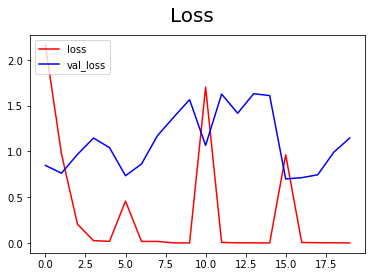

In [25]:
fig = plt.figure()
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
plt.plot(loss, color='red', label='loss')
plt.plot(val_loss, color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

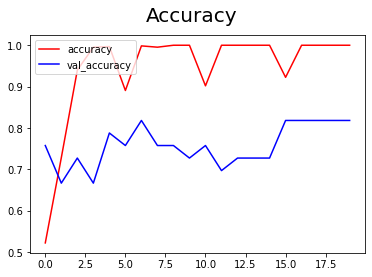

In [22]:
fig = plt.figure()
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
plt.plot(acc, color='red', label='accuracy')
plt.plot(val_acc, color='blue', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [23]:
validation_dataset.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

### Test

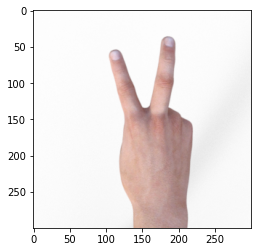

1/1 [==============================] - 3s 3s/step
[[0. 0. 1.]]
scissors


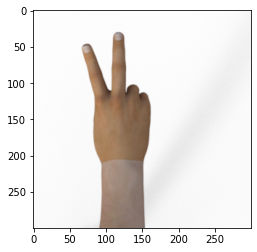

1/1 [==============================] - 0s 95ms/step
[[1. 0. 0.]]
paper


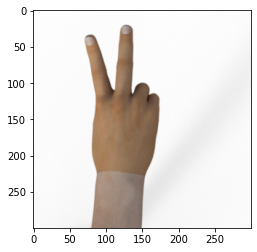

1/1 [==============================] - 0s 82ms/step
[[1. 0. 0.]]
paper


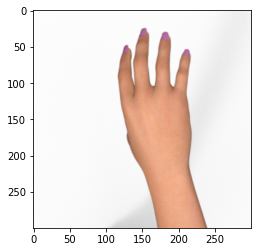

1/1 [==============================] - 0s 60ms/step
[[1. 0. 0.]]
paper


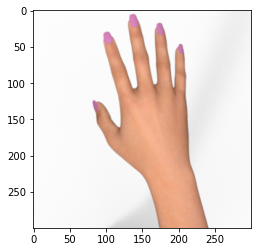

1/1 [==============================] - 0s 70ms/step
[[1. 0. 0.]]
paper


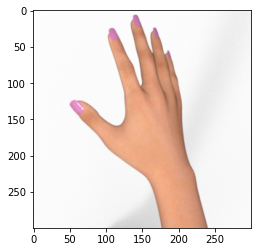

1/1 [==============================] - 0s 106ms/step
[[1. 0. 0.]]
paper


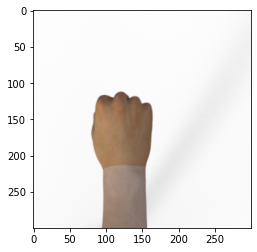

1/1 [==============================] - 0s 66ms/step
[[1. 0. 0.]]
paper


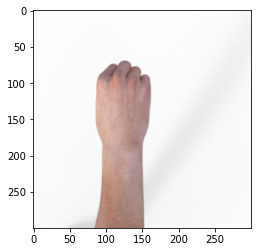

1/1 [==============================] - 0s 57ms/step
[[0. 1. 0.]]
rock


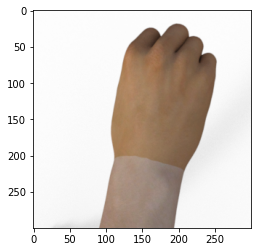

1/1 [==============================] - 0s 63ms/step
[[0. 1. 0.]]
rock


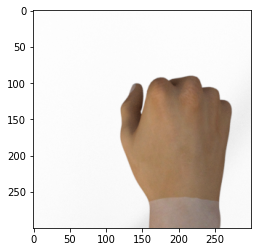

1/1 [==============================] - 0s 63ms/step
[[0. 0. 1.]]
scissors


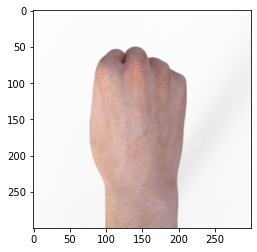

1/1 [==============================] - 0s 76ms/step
[[0. 1. 0.]]
rock


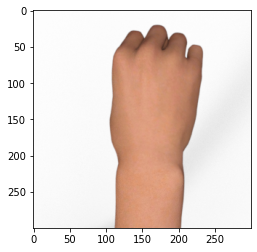

1/1 [==============================] - 0s 67ms/step
[[0. 1. 0.]]
rock


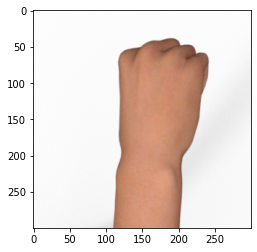

1/1 [==============================] - 0s 58ms/step
[[0. 1. 0.]]
rock


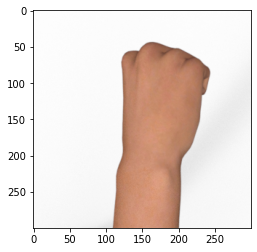

1/1 [==============================] - 0s 56ms/step
[[0. 1. 0.]]
rock


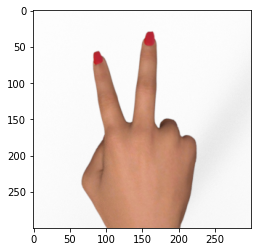

1/1 [==============================] - 0s 75ms/step
[[0. 0. 1.]]
scissors


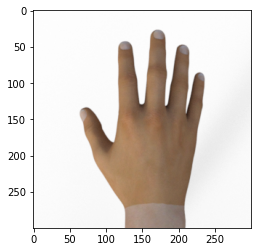

1/1 [==============================] - 0s 78ms/step
[[1. 0. 0.]]
paper


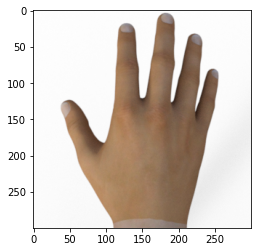

1/1 [==============================] - 0s 59ms/step
[[0. 0. 1.]]
scissors


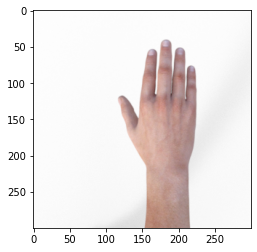

1/1 [==============================] - 0s 59ms/step
[[1. 0. 0.]]
paper


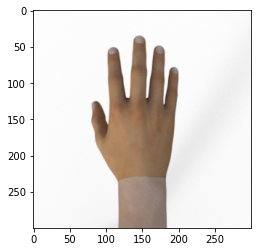

1/1 [==============================] - 0s 71ms/step
[[1. 0. 0.]]
paper


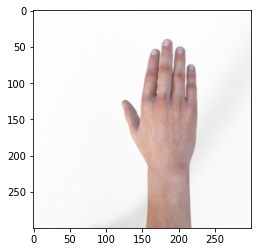

1/1 [==============================] - 0s 63ms/step
[[1. 0. 0.]]
paper


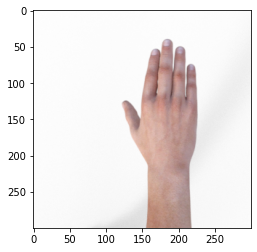

1/1 [==============================] - 0s 66ms/step
[[1. 0. 0.]]
paper


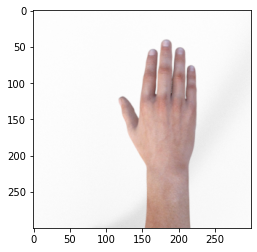

1/1 [==============================] - 0s 58ms/step
[[1. 0. 0.]]
paper


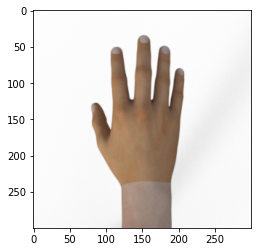

1/1 [==============================] - 0s 57ms/step
[[1. 0. 0.]]
paper


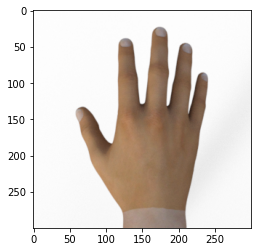

1/1 [==============================] - 0s 73ms/step
[[1. 0. 0.]]
paper


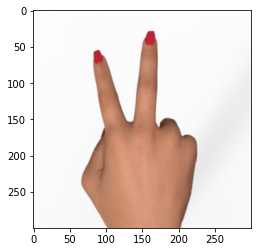

1/1 [==============================] - 0s 59ms/step
[[1. 0. 0.]]
paper


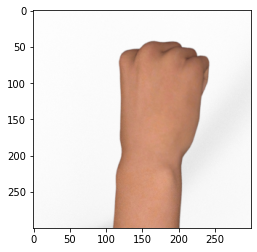

1/1 [==============================] - 0s 58ms/step
[[0. 1. 0.]]
rock


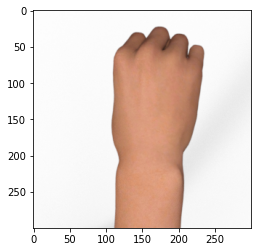

1/1 [==============================] - 0s 90ms/step
[[0. 1. 0.]]
rock


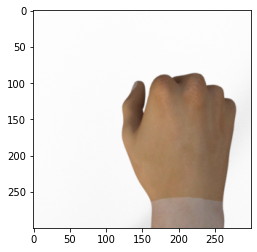

1/1 [==============================] - 0s 59ms/step
[[0. 1. 0.]]
rock


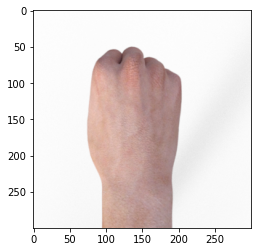

1/1 [==============================] - 0s 59ms/step
[[0. 1. 0.]]
rock


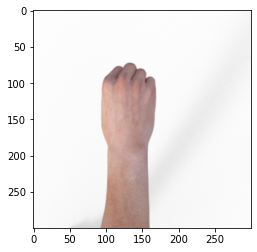

1/1 [==============================] - 0s 59ms/step
[[0. 1. 0.]]
rock


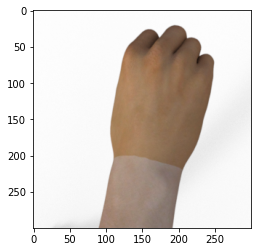

1/1 [==============================] - 0s 56ms/step
[[0. 1. 0.]]
rock


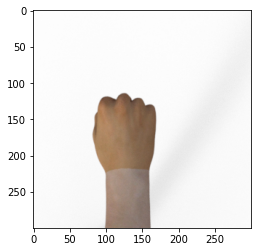

1/1 [==============================] - 0s 59ms/step
[[1. 0. 0.]]
paper


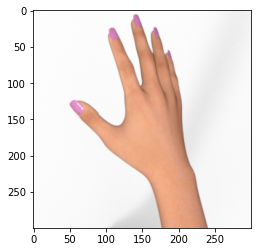

1/1 [==============================] - 0s 61ms/step
[[1. 0. 0.]]
paper


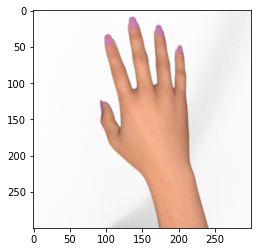

1/1 [==============================] - 0s 56ms/step
[[1. 0. 0.]]
paper


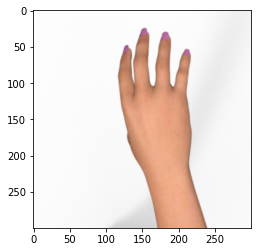

1/1 [==============================] - 0s 64ms/step
[[1. 0. 0.]]
paper


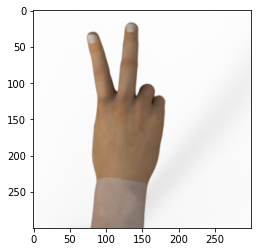

1/1 [==============================] - 0s 58ms/step
[[1. 0. 0.]]
paper


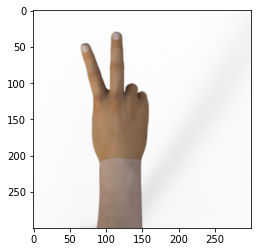

1/1 [==============================] - 0s 60ms/step
[[1. 0. 0.]]
paper


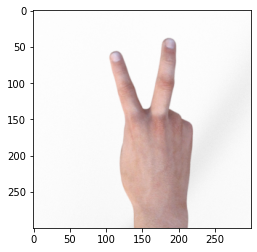

1/1 [==============================] - 0s 64ms/step
[[0. 0. 1.]]
scissors


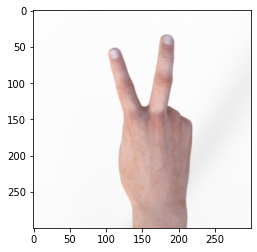

1/1 [==============================] - 0s 60ms/step
[[0. 0. 1.]]
scissors


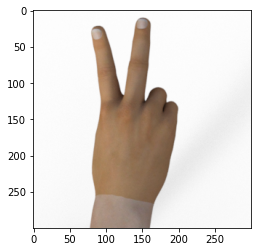

1/1 [==============================] - 0s 62ms/step
[[1. 0. 0.]]
paper


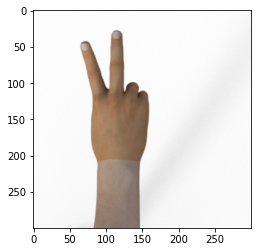

1/1 [==============================] - 0s 66ms/step
[[1. 0. 0.]]
paper


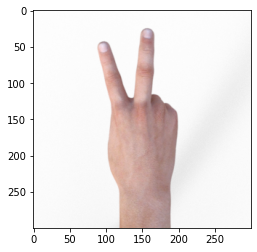

1/1 [==============================] - 0s 56ms/step
[[1. 0. 0.]]
paper


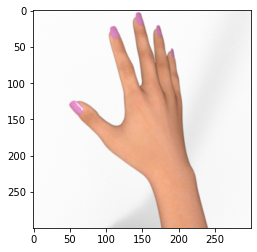

1/1 [==============================] - 0s 70ms/step
[[1. 0. 0.]]
paper


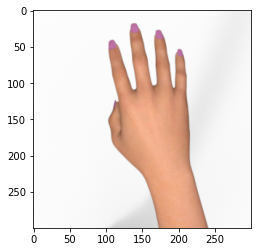

1/1 [==============================] - 0s 57ms/step
[[1. 0. 0.]]
paper


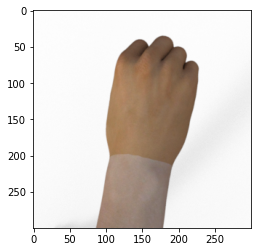

1/1 [==============================] - 0s 63ms/step
[[0. 1. 0.]]
rock


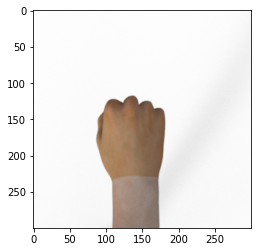

1/1 [==============================] - 0s 56ms/step
[[0. 0. 1.]]
scissors


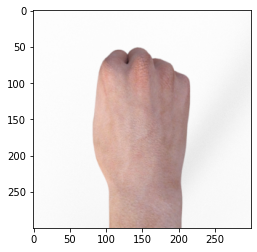

1/1 [==============================] - 0s 67ms/step
[[0. 1. 0.]]
rock


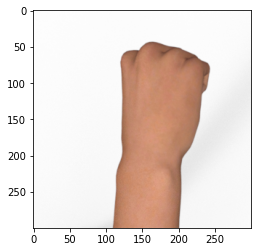

1/1 [==============================] - 0s 63ms/step
[[0. 1. 0.]]
rock


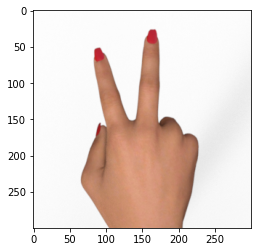

1/1 [==============================] - 0s 55ms/step
[[1. 0. 0.]]
paper


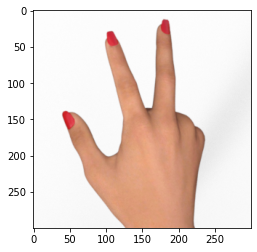

1/1 [==============================] - 0s 57ms/step
[[0. 0. 1.]]
scissors


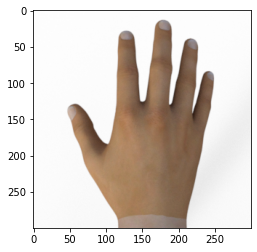

1/1 [==============================] - 0s 67ms/step
[[0. 0. 1.]]
scissors


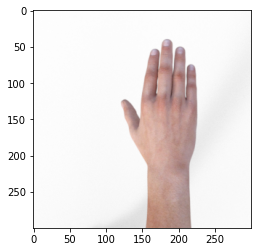

1/1 [==============================] - 0s 57ms/step
[[1. 0. 0.]]
paper


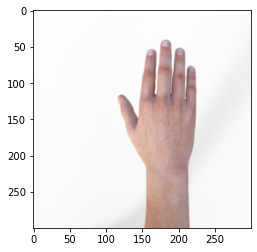

1/1 [==============================] - 0s 59ms/step
[[1. 0. 0.]]
paper


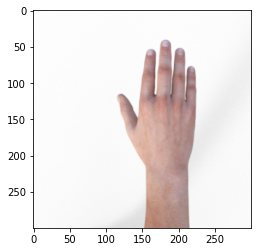

1/1 [==============================] - 0s 60ms/step
[[1. 0. 0.]]
paper


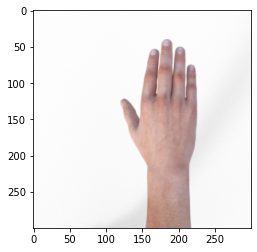

1/1 [==============================] - 0s 66ms/step
[[1. 0. 0.]]
paper


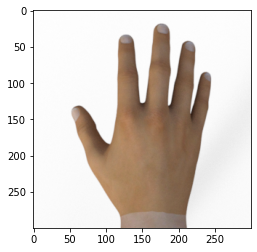

1/1 [==============================] - 0s 56ms/step
[[9.9976426e-01 0.0000000e+00 2.3571990e-04]]


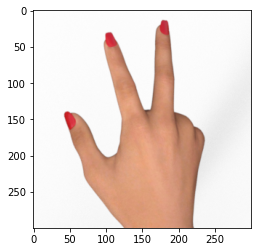

1/1 [==============================] - 0s 55ms/step
[[0. 0. 1.]]
scissors


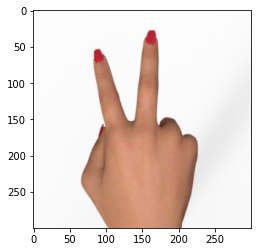

1/1 [==============================] - 0s 54ms/step
[[1. 0. 0.]]
paper


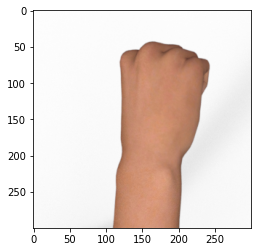

1/1 [==============================] - 0s 59ms/step
[[0. 1. 0.]]
rock


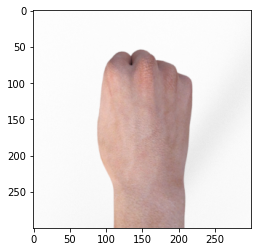

1/1 [==============================] - 0s 57ms/step
[[0. 1. 0.]]
rock


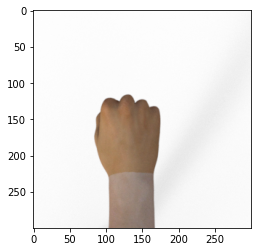

1/1 [==============================] - 0s 59ms/step
[[0.00233992 0.         0.99766004]]


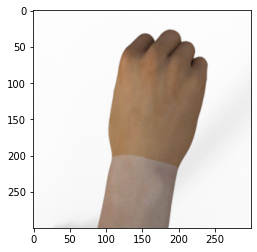

1/1 [==============================] - 0s 60ms/step
[[0. 1. 0.]]
rock


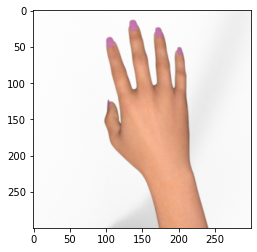

1/1 [==============================] - 0s 55ms/step
[[1. 0. 0.]]
paper


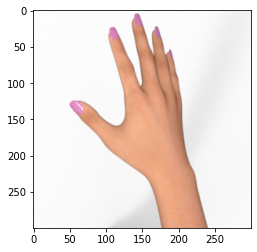

1/1 [==============================] - 0s 55ms/step
[[1. 0. 0.]]
paper


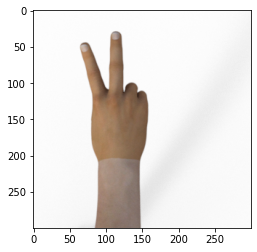

1/1 [==============================] - 0s 61ms/step
[[1. 0. 0.]]
paper


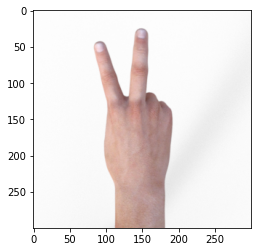

1/1 [==============================] - 0s 57ms/step
[[1. 0. 0.]]
paper


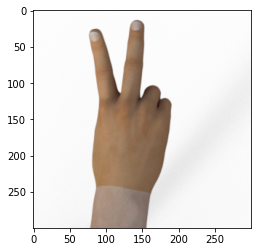

1/1 [==============================] - 0s 55ms/step
[[3.5009797e-25 0.0000000e+00 1.0000000e+00]]
scissors


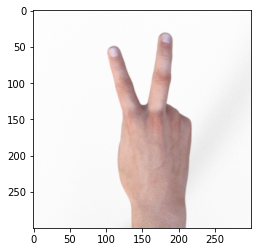

1/1 [==============================] - 0s 60ms/step
[[0. 0. 1.]]
scissors


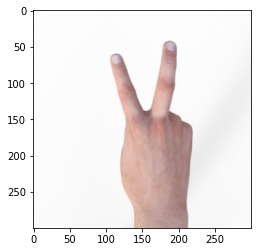

1/1 [==============================] - 0s 58ms/step
[[0. 0. 1.]]
scissors


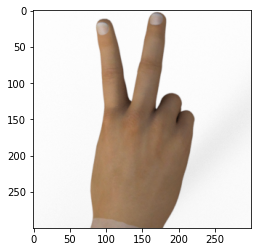

1/1 [==============================] - 0s 57ms/step
[[0. 0. 1.]]
scissors


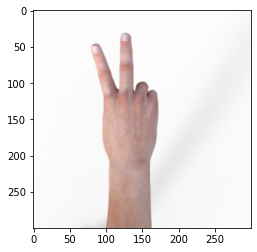

1/1 [==============================] - 0s 58ms/step
[[0. 1. 0.]]
rock


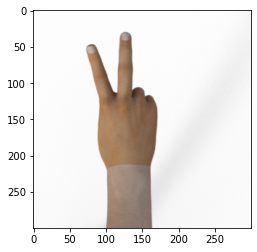

1/1 [==============================] - 0s 61ms/step
[[1. 0. 0.]]
paper


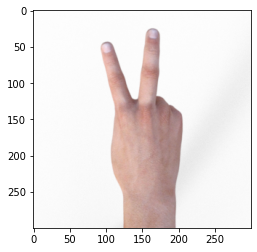

1/1 [==============================] - 0s 61ms/step
[[0. 0. 1.]]
scissors


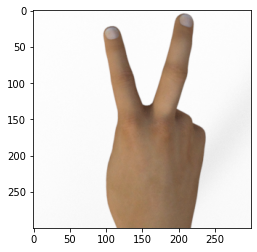

1/1 [==============================] - 0s 58ms/step
[[0. 0. 1.]]
scissors


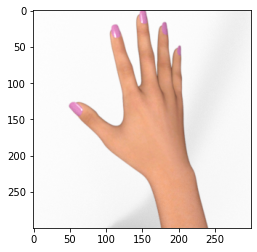

1/1 [==============================] - 0s 70ms/step
[[1. 0. 0.]]
paper


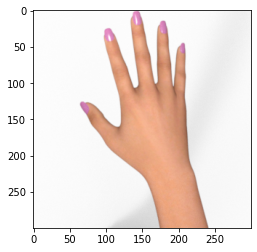

1/1 [==============================] - 0s 62ms/step
[[1. 0. 0.]]
paper


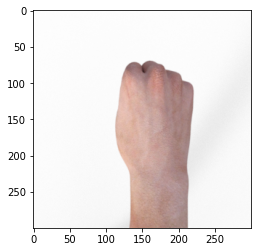

1/1 [==============================] - 0s 66ms/step
[[0. 1. 0.]]
rock


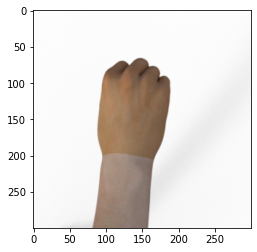

1/1 [==============================] - 0s 58ms/step
[[0. 1. 0.]]
rock


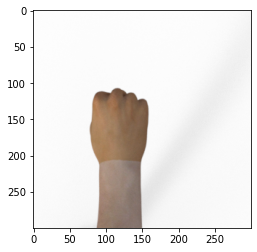

1/1 [==============================] - 0s 55ms/step
[[1.0000000e+00 0.0000000e+00 1.0831796e-11]]
paper


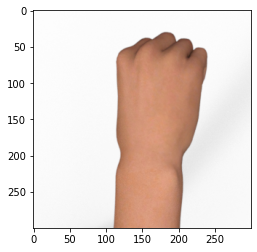

1/1 [==============================] - 0s 55ms/step
[[0. 1. 0.]]
rock


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1df8ae4d0>

In [24]:
# testset 
dir_path = 'Rock-Paper-Scissors/test_all'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size= (300, 300))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if val[0][1] == 1:
        print("rock")
    elif val[0][0] == 1:
        print ("paper")
    elif val[0][2] == 1:
        print ("scissors")

Link to dataset : https://www.kaggle.com/datasets/sanikamal/rock-paper-scissors-dataset
        